<a href="https://colab.research.google.com/github/drawcodeboy/first_ML_DL/blob/main/firstMLDL_03_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#특성 공학과 규제 (Feature Engineering and Regularization)
>* 하나의 feature를 사용하여 선형 회귀 모델을 만들어 보았다. 하지만, Underfitting이 생겼기 때문에 여러 개의 feature를 이용하여 선형 회귀를 시켜 모델을 만들어보자. 이를 <b>다중 회귀(Multiple Regression)</b>이라 한다.
>* 여러 개의 feature를 사용한다고 해서 선형 회귀가 다중 회귀보다 무조건 성능이 낮을 거라고 오해해서는 안 된다.
>* 특성 공학이란?

In [2]:
# 데이터 준비

# 이번엔 pandas(데이터 분석 라이브러리)를 이용하여 dataframe을 활용해 데이터를 가져와보자.

import pandas as pd

df = pd.read_csv('http://bit.ly/perch_csv_data') # read_csv: 주소를 parameter로 넣음으로써 data를 가져옴, 기본적으로 sep이 ','로 되어있음
perch_full = df.to_numpy() # dataframe 메서드 to_numpy: 데이터프레임을 넘파이 배열로 변환하는 메서드
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
# 타깃 데이터 준비

import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state = 42
)

#특성 공학(Feature Engineering)
>* 기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업

#사이킷런의 변환기(Transformer)

>* 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다.
>* 모델 클래스에 일관 되게 <b>fit(), score(), predict() </b>메서드가 있는 것처럼 변환기 클래스는 모두 <b>fit(), transform()</b> 메서드를 제공한다.
>* 모델 클래스는 추정기(Estimator)라고도 부른다.

In [5]:
# 사이킷런의 변환기 (Transformer)
# 이번에 사용할 변환기 는 PolynomialFeatures이다.

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False) # include_bias: 절편이 굳이 필요없음.
poly.fit(train_input) # 새롭게 만들 feature 조합을 찾는다. 
train_poly = poly.transform(train_input) # 조합을 찾은 뒤 transform
print(train_poly.shape)

(42, 9)


In [6]:
# 변환기에서 만든 조합을 보기 위한 메서드
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [7]:
test_poly = poly.transform(test_input)

# 테스트 세트를 따로 변환해도 되지만 항상 훈련 세트를 기준으로 변환하는 습관을 들이는 게 좋다.

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 더 많은 특성을 사용하고(Multiple Regression), 특성 공학을 활용하여 새로운 특성들을 만들어 사용한 결과
# 점수가 꽤 높게 나오며 과소적합 문제를 해결했다.

0.9903183436982124
0.9714559911594134


# 그렇다면 특성이 많아진다면 점수가 더 높아질까?
\>\> 고차항의 최대 차수를 높여 모델을 다시 만들어보자.

In [9]:
# 최고 차항을 5로 올림
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)

# transform
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 55개의 feature가 생긴 것을 확인
print(train_poly.shape)

# 선형회귀 모델 다시 fit
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 훈련세트에만 너무 Overfitting된 현상이 일어남.
# 이러한 경우 규제(Regularization)이 필요함.

(42, 55)
0.9999999999991097
-144.40579242684848


# 규제(Regularization)
>* 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것 -> <b>Overfitting</b>이 일어나지 않게 하는 것
>* <b>선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일</b>
>* 기울기를 줄여 보다 <b>보편적인 패턴을 학습</b>하게끔 한다.



In [10]:
# Normalization, Standardization
# Data Preprocessing

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly) # 2장에서 나온 Scaling과 같으나 사용하는 이유는 다르다.
# 2장: 각 Feature의 Scale이 큰 차이가 나서
# 이번 장: 규제를 할 때, 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않기 때문이다.

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#Ridge vs Lasso
>* 릿지는 계수를 제곱한 값을 기준으로 규제를 적용
>* 라쏘는 계수의 절댓값을 기준으로 규제를 적용
>* 일반적으로 릿지를 선호
>* 두 알고리즘 모두 계수의 크기를 줄이지만 Lasso는 계수를 아예 0으로 만들 수도 있다.
#Hyperparameter
>* 릿지와 라쏘는 규제의 양을 임의로 조절할 수 있다.
>* 모델 객체를 만들 때, alpha 매개변수로 규제의 강도를 조절한다.
>* 이렇게 모델이 학습할 수 없고, 사람이 알려줘야 하는 파라미터를 하이퍼파라미터라고 한다.
>* alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고, 조금 더 과소적합이 되도록 유도한다.
>* alpha 값이 작으면 규제 강도가 작아지므로 계수 값을 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.

In [11]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

# Overfitting이나 Underfitting 모두 없이 좋은 성능을 내고 있음

0.9896101671037343
0.9790693977615391


In [12]:
# 적절한 alpha 값 찾기 -> 각 alpha 값에 대한 R^2 그래프 그려보기
# 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 됨

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

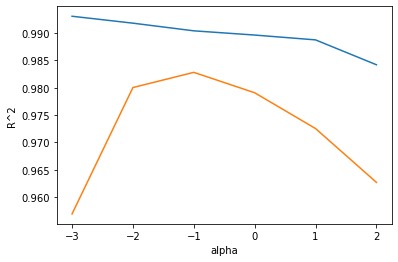

In [13]:
#이대로 그래프를 그리기엔 scale이 너무 차이나서 한계가 있음 상용로그를 통해 x축을 바꿔주자

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# alpha가 0.1일 때, 최적의 Regularization이 된다.

In [18]:
# Ridge Regression

ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

# 과대소적합 X, 둘 다 높음 => 성능 좋음

0.9903815817570365
0.9827976465386884


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

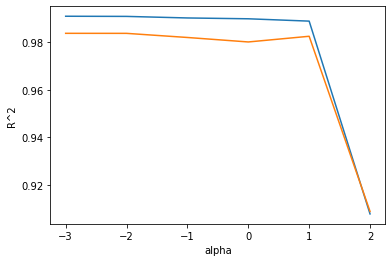

In [20]:
# Lasso Regression

from sklearn.linear_model import Lasso

# 최적의 alpha값(Hyperparameter)찾기
train_score = []
test_score = []

for alpha in alpha_list:
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))


plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 최적의 alpha 값 = 1(10^1) => 10

In [21]:
# 최적의 Hyperparameter로 Lasso Regression Model을 훈련시킴

lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [22]:
# Lasso는 계수를 완전히 0으로 만들어버릴 수 있다고 함.
# 계수가 0인 것이 개수를 알아보자.

print(np.sum(lasso.coef_ == 0))

40
